In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pdb


In [91]:
data_dir = f'/lab_data/behrmannlab/claire/pepdoc/results_ex1' #read in the file; first value is the file name
bin_size = 5 #20 ms bins (EACH BIN IS 4 MS SO 5 ROWS ARE 20 MS)
categories = ['tool','nontool','bird','insect']
labels = np.asanyarray([0]*5 + [1]*5 + [2]*5 + [3]*5) #creates labels for data

#d_channels = [128, 129, 130, 142, 141, 153, 152, 140]
#v_channels = [92, 93, 94, 102, 103, 104, 91, 111]
svm_test_size = .4
svm_splits = 20
sss = StratifiedShuffleSplit(n_splits=svm_splits, test_size=svm_test_size)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

#d_cols = [f'E{ii}' for ii in d_channels]
#v_cols = [f'E{ii}' for ii in v_channels]

In [92]:
'''
Load All Subjects Data
'''

'''
d_channels = [130]
v_channels = [104]
d_cols = [f'E{ii}' for ii in d_channels]
v_cols = [f'E{ii}' for ii in v_channels]
'''

all_subs = ['AC_newepoch','AM', 'BB','CM','GG','HA','IB','JR','ZZ']
#all_subs = ['AC_newepoch','AM','BB','CM','GG','HA','ZZ']
#all_subs = ['AC_newepoch','BB','CM','GG','HA','IB','JR','ZZ']
all_sub_data = []
#all_dorsal =[]
#all_ventral =[]

for nSubject in all_subs: #loop through categories
    all_data =[]
    for category in categories: #loop through categories
        for nn in range(1,6): #loop through exemplars in categories
           
            curr_df = pd.read_csv(f'/{data_dir}/{nSubject}/{category}s/{category}{nn}.tsv' , sep='\t')#read in the file; first value is the file name
            curr_df = curr_df.T #use pandas to transpose data
            curr_df.columns = curr_df.iloc[0] #set the column names to the first row
            curr_df = curr_df.drop(curr_df.index[0]) #drop the first row
            curr_df = curr_df.astype(float) #convert to float

            bin_data = curr_df.rolling(bin_size).mean() #rolling avg given the bin size
            
            bin_data = bin_data.dropna() #drop missing values
            bin_data = bin_data.reset_index() #reset the index of the dataframe
            
            bin_data = bin_data.drop(columns = ['index']) #drop columns

            #dorsal_data = bin_data[d_cols]
            #ventral_data = bin_data[v_cols]

            all_data.append(bin_data.to_numpy())
            #all_dorsal.append(dorsal_data.to_numpy())
            #all_ventral.append(ventral_data.to_numpy())
            #all_subs.append(nSubject.split('_')[0])
            
          
    all_data = np.asanyarray(all_data) # the error "ValueError: could not broadcast input array from shape (138,240) into shape (138,)" is because the data is not the same length for all participants/error in adding participants.
    #all_dorsal = np.asanyarray(all_dorsal)
    #all_ventral = np.asanyarray(all_ventral)  
    all_sub_data.append(all_data) #add the subject to the list of subjects

In [ ]:
for col in dorsal_data.columns:
    plt.plot(bin_data[col])

In [93]:
"""
Decode from all channels
"""
all_sub_decode = []

for sub_decode in all_sub_data: # for loop print each iteration of the list (each column)
    #empty list to hold acc
    cat_decode = []
    for time in range(0, sub_decode.shape[1]):
        
        X = sub_decode[:,time,:] #grab all data for that time point
        y = labels #set Y to be the labels
        
        temp_acc = [] #create empty list accuracy for each timepoint
        for train_index, test_index in sss.split(X, y): #grab indices for training and test

            X_train, X_test = X[train_index], X[test_index] #
            y_train, y_test = y[train_index], y[test_index]

            clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
            clf.fit(X_train, y_train)   

            temp_acc.append(clf.score(X_test, y_test))

        cat_decode.append(np.mean(temp_acc))

    cat_decode = np.asanyarray(cat_decode)
    all_sub_decode.append(cat_decode)

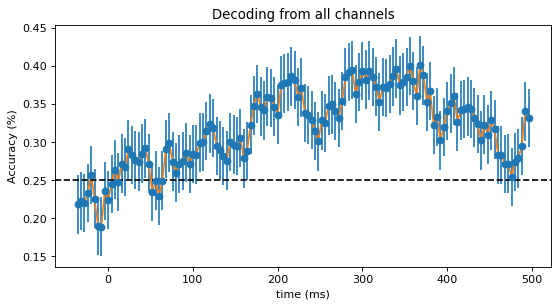

In [99]:
'''PLOT DECODING RESULTS - ALL SUBJECTS AND CHANNELS'''

mean_decode = np.mean(all_sub_decode, axis=0)
decode_std = np.std(all_sub_decode, axis=0) 
std_error = np.std(all_sub_decode, ddof=1) / np.sqrt(len(all_sub_decode))

#plt.plot(np.mean(all_sub_decode, axis=0))
from matplotlib.pyplot import figure
figure(figsize=(8, 4), dpi=80)

timepoints = list(range(-36, 500, 4))

plt.errorbar(timepoints, mean_decode, yerr=std_error, fmt='o')
plt.plot(timepoints, mean_decode) #...plot the data, add error bars to mat plot lib, use standard error of the mean to add., there is a package called psypy to do this (psyplot - SEM)
plt.axhline(y=0.25, color='k', linestyle='--')
plt.xlabel('time (ms)')
plt.ylabel('Accuracy (%)')
plt.title('Decoding from all channels')
plt.show()



0


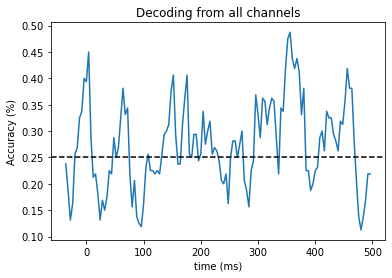

<Figure size 640x320 with 0 Axes>

1


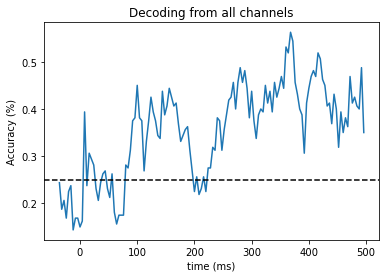

<Figure size 640x320 with 0 Axes>

2


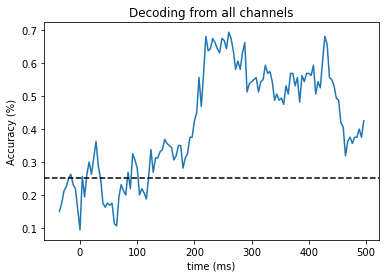

<Figure size 640x320 with 0 Axes>

3


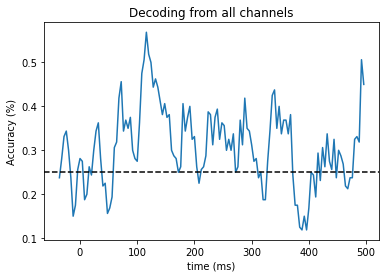

<Figure size 640x320 with 0 Axes>

4


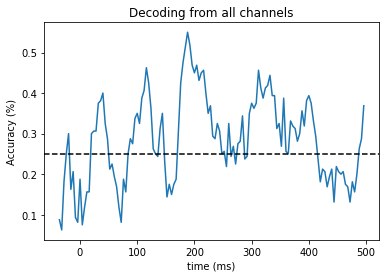

<Figure size 640x320 with 0 Axes>

5


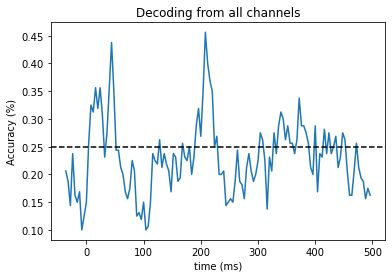

<Figure size 640x320 with 0 Axes>

6


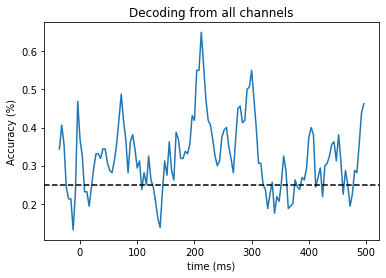

<Figure size 640x320 with 0 Axes>

7


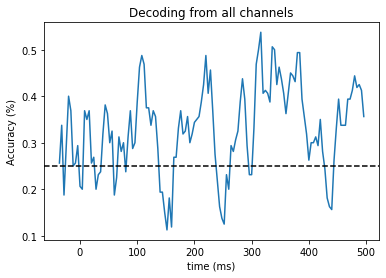

<Figure size 640x320 with 0 Axes>

8


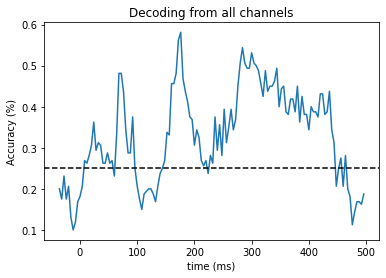

<Figure size 640x320 with 0 Axes>

In [98]:
'''PLOT DECODING RESULTS - SINGLE SUBJECTS'''

iSub_plot = []
n = 0
for plot_iSub in all_sub_decode:
    print(n)
    mean_decode = np.mean(all_sub_decode, axis=0)
    decode_std = np.std(all_sub_decode, axis=0) 
    std_error = np.std(all_sub_decode, ddof=1) / np.sqrt(len(all_sub_decode))

    
    

    timepoints = list(range(-36, 500, 4))
    plt.plot(timepoints, plot_iSub) #...plot the data, add error bars to mat plot lib, use standard error of the mean to add., there is a package called psypy to do this (psyplot - SEM)
    #plt.errorbar(timepoints, mean_decode, yerr=std_error, fmt='o')

    plt.axhline(y=0.25, color='k', linestyle='--')
    plt.xlabel('time (ms)')
    plt.ylabel('Accuracy (%)')
    plt.title('Decoding from all channels')
    
    
    
    figure(figsize=(8, 4), dpi=80)
    plt.show()
    n += 1

    

In [80]:
nSubject

'ZZ'

In [ ]:
"""

Decode from dorsal channels

"""

cat_decode = []
for time in range(0, all_dorsal.shape[1]):
    
    X = all_dorsal[:,time,:]
    y = labels

    temp_acc = []
    for train_index, test_index in sss.split(X, y):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #pdb.set_trace()
        clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
        clf.fit(X_train, y_train)   

        temp_acc.append(clf.score(X_test, y_test))

    cat_decode.append(np.mean(temp_acc))

dorsal = cat_decode

In [ ]:
bin_data.columns

In [ ]:
bin_data['E1'][0]